In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
import ipywidgets as widgets
from ipywidgets import interact, fixed, Dropdown, Checkbox, FloatSlider, IntSlider, Output, VBox, HBox

from numpy import cos, sin, cosh, sinh, tan, arctan, exp, log, pi, array, linspace, arange, sqrt, meshgrid
from numpy.linalg import norm
from mpl_toolkits import mplot3d

%matplotlib widget

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [2]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}
</style>

<p style="padding-bottom:40%;"> </p>


## One-minute Review

The **chain rule** for a differentiable function $f:\RR^n \to \RR$ and a differentiable curve $\vec r:\RR\to\RR^n$ is  $$ \frac{d}{dt} f\circ \vec r(t) = \nabla f (\vec r(t))\cdot \vec r'(t)$$

where $\nabla f = \langle f_{x_1}, \cdots, f_{x_n} \rangle$. 

<p style="padding-bottom:40%;"> </p>

# Lecture 11 - Gradients

  - Objectives
    - Define directional derivatives.
    - Compute $D_\vec u f$ using the gradient.
    - Use the properties of $\nabla f$ to compute tangent spaces and the like.
    
  - Resources
    - Content
      - Stewart: §14.6
      - New Strang: [§4.6](https://cnx.org/contents/oxzXkyFi@6.1:gkQNvJr6@7/4-6-Directional-Derivatives-and-the-Gradient)

    - Practice
      - Mooculus: [The Gradient](https://ximera.osu.edu/mooculus/calculus3/interpretingTheGradient/digInGradient)
    - Extras
      - CalcBLUE: [Gradients](https://www.youtube.com/watch?v=zEvGUXXW1BI&list=PL8erL0pXF3JZZTnqjginERYYEi1WpLE_V&index=58) 

<p style="padding-bottom:40%;"> </p>

## Directional Derivatives

Partial derivatives give rates of change in coordinate directions, but what of the (infinite) other directions in which a function is changing?

#### Fundamental example

Given an elevation map, the partial derivatives give slopes in the cardinal directions, but we want to know how the terrain is changing as we head northeast, or, perhaps, which direction has the steepest climb?

![Topographic map example](../img/adiron.png)


<div class="alert alert-block alert-info shadow"> 
<strong>Definition</strong>
    
<p>Let $\vec u$ be a <em>unit vector</em>. The <b>directional derivative</b> of $f$ at $\vec x$ in the direction $\vec u$ is

$$D_\vec u f(\vec x) = \lim_{h \to 0}\frac{f(\vec x+ h\vec u) - f(\vec x)}{h}.$$</p>
</div>

<p style="padding-bottom:40%;"> </p>

### Use the Chain Rule. 

Let $\vec r(h) = \vec x + h\vec u$. Then $$D_\vec u f(\vec x) = (f\circ \vec r)'(0)$$

$$= \nabla f(\vec r(0))\cdot \vec r'(0)$$

$$= \nabla f(\vec x)\cdot \vec u.$$

### 
<p style="padding-bottom:40%;"> </p>

## Example

Find the directional derivative of the function $$f(x,y) = e^{y-x^2}$$ at the point $(1,0)$ in the direction of $\langle -1,1\rangle$.

<p style="padding-bottom:40%;"> </p>

In [3]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(10,5))
    plt.ion()
    
    ax = fig.add_subplot(121, projection='3d') 
    ax2 = fig.add_subplot(122, projection='3d') 
    
    func = lambda x,y: exp(y-x**2)
    u0 = np.arccos(-2/sqrt(5))
    
    slider = FloatSlider(min=u0-pi, max=u0+pi, step=pi/12, value=u0)
    u = slider.value
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = np.arange(1/exp(1)-.2,3,.2))
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    q2 = ax2.quiver([1,1],[0,0],[-2/exp(1),cos(u)],[exp(-1),sin(u)],lw=3,color=['r','b'],alpha=1,angles='xy', scale_units='xy', scale=1)

    s = np.linspace(0,20,100)
    s = np.array([tt for tt in s if (np.abs(tt*cos(u)+1) <= 3/2) and (np.abs(tt*sin(u)) <= 3/2)])
    pl = ax.plot(s*cos(u)+1,s*sin(u),func(s*cos(u)+1,s*sin(u)),lw=3,ls='--',color='k')[0]
    pl2 = ax2.plot(s*cos(u)+1,s*sin(u),lw=2,ls='--',color='k')[0]
    pl1 = ax.plot(s*cos(u)+1,s*sin(u),exp(-1) + s*(sin(u)*exp(-1)-2*cos(u)*exp(-1)),lw=3,color='b')[0]
    ax.scatter(1,0,exp(-1))
    ax.set_xlim3d([-3/2,3/2])
    ax.set_ylim3d([-3/2,3/2])
    ax.set_zlim3d([0,4])
    ax2.set_title(r"$D_{\vec u} f = $" + ("%.3f" % (sin(u)*exp(-1)-2*cos(u)*exp(-1),)))
    ax2.grid(True)
    
    def update(change):
        u = slider.value
        s = np.linspace(0,20,100)
        s = np.array([tt for tt in s if (np.abs(tt*cos(u)+1) <= 3/2) and (np.abs(tt*sin(u)) <= 3/2)])
        pl.set_data_3d(s*cos(u)+1,s*sin(u),func(s*cos(u)+1,s*sin(u)))
        pl1.set_data_3d(s*cos(u)+1,s*sin(u),exp(-1) + s*(sin(u)*exp(-1)-2*cos(u)*exp(-1)))
        pl2.set_data(s*cos(u)+1,s*sin(u))

        ax2.collections.pop()
        q2 = ax2.quiver([1,1],[0,0],[-2/exp(1),cos(u)],[exp(-1),sin(u)],lw=3,color=['r','b'],alpha=1,angles='xy', scale_units='xy', scale=1)
        
        ax2.set_title(r"$D_{\vec u} f = $" + ("%.3f" % (sin(u)*exp(-1)-2*cos(u)*exp(-1),)))

    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("A directional derivative")

<p style="padding-bottom:40%;"> </p>

In [ ]:
e = exp(1)
u = array((-1,1))/sqrt(2)
gradf = array((-2/e,1/e))
np.dot(gradf,u)

<p style="padding-bottom:40%;"> </p>

### Some questions

In [5]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(10,5))
    plt.ion()
    
    ax = fig.add_subplot(121, projection='3d') 
    ax2 = fig.add_subplot(122, projection='3d') 
    
    func = lambda x,y: exp(y-x**2)
    u0 = np.arccos(-2/sqrt(5))
    
    slider = FloatSlider(min=u0-pi, max=u0+pi, step=pi/36, value=u0)
    u = slider.value
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = np.arange(1/exp(1)-.2,3,.2))
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    q2 = ax2.quiver([1,1],[0,0],[-2/exp(1),cos(u)],[exp(-1),sin(u)],lw=3,color=['r','b'],alpha=1,angles='xy', scale_units='xy', scale=1)

    s = np.linspace(0,20,100)
    s = np.array([tt for tt in s if (np.abs(tt*cos(u)+1) <= 3/2) and (np.abs(tt*sin(u)) <= 3/2)])
    pl = ax.plot(s*cos(u)+1,s*sin(u),func(s*cos(u)+1,s*sin(u)),lw=3,ls='--',color='k')[0]
    pl2 = ax2.plot(s*cos(u)+1,s*sin(u),lw=2,ls='--',color='k')[0]
    pl1 = ax.plot(s*cos(u)+1,s*sin(u),exp(-1) + s*(sin(u)*exp(-1)-2*cos(u)*exp(-1)),lw=3,color='b')[0]
    ax.scatter(1,0,exp(-1))
    ax.set_xlim3d([-3/2,3/2])
    ax.set_ylim3d([-3/2,3/2])
    ax.set_zlim3d([0,4])
    ax2.set_title(r"$D_{\vec u} f = $" + ("%.3f" % (sin(u)*exp(-1)-2*cos(u)*exp(-1),)))
    ax2.grid(True)
    
    def update(change):
        u = slider.value
        s = np.linspace(0,20,100)
        s = np.array([tt for tt in s if (np.abs(tt*cos(u)+1) <= 3/2) and (np.abs(tt*sin(u)) <= 3/2)])
        pl.set_data_3d(s*cos(u)+1,s*sin(u),func(s*cos(u)+1,s*sin(u)))
        pl1.set_data_3d(s*cos(u)+1,s*sin(u),exp(-1) + s*(sin(u)*exp(-1)-2*cos(u)*exp(-1)))
        pl2.set_data(s*cos(u)+1,s*sin(u))

        ax2.collections.pop()
        q2 = ax2.quiver([1,1],[0,0],[-2/exp(1),cos(u)],[exp(-1),sin(u)],lw=3,color=['r','b'],alpha=1,angles='xy', scale_units='xy', scale=1)
        
        ax2.set_title(r"$D_{\vec u} f = $" + ("%.3f" % (sin(u)*exp(-1)-2*cos(u)*exp(-1),)))

    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Questions")

  1. Must there always be a direction $\vec u$ such that $D_\vec u f = 0$?

<p style="padding-bottom:40%;"> </p>

  2. What is $D_{-\vec u} f$?

<p style="padding-bottom:40%;"> </p>

  3. What if $D_{\vec u} f = 1$ in all directions $\vec u$?
  
  ![Plot of cone](../img/cone.png)
 

<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-success shadow"> 
<h3>Properties of the gradient </h3>
       
<p> The gradient vector packs a <em>ton</em> of information about how a differentiable function is changing. </p>

<ol>
    <li>The gradient is orthogonal to level sets.</li>
    <li>It points in the direction of greatest change.</li>
    <li>Its magnitude is the amount of greatest change.</li>
</ol>
    <strong>Nota bene: This is the important stuff. </strong> 
</div>

    


<p style="padding-bottom:40%;"> </p>

### 1. The gradient is orthogonal to level sets.

<p style="padding-bottom:40%;"> </p>

Suppose $\langle x(t),y(t) \rangle$ is a smooth curve **inside a level set** $f(x,y) = c$ of a differentiable function $f$.

We compute $$\frac {d}{dt} f(x(t),y(t)) = 0 $$ 

$$ f_x(x(t),y(t)) x'(t) + f_y(x(t),y(t)) y'(t) = 0$$


$$= \nabla f \cdot \begin{bmatrix} x'(t) \\ y'(t) \end{bmatrix} = 0$$

Note this second vector is tangent to the level set (a curve here). This gives us the result.

#### Example

Plot several vectors perpendicular to the surface $x^2 + y^2 = 1 + z^2$.

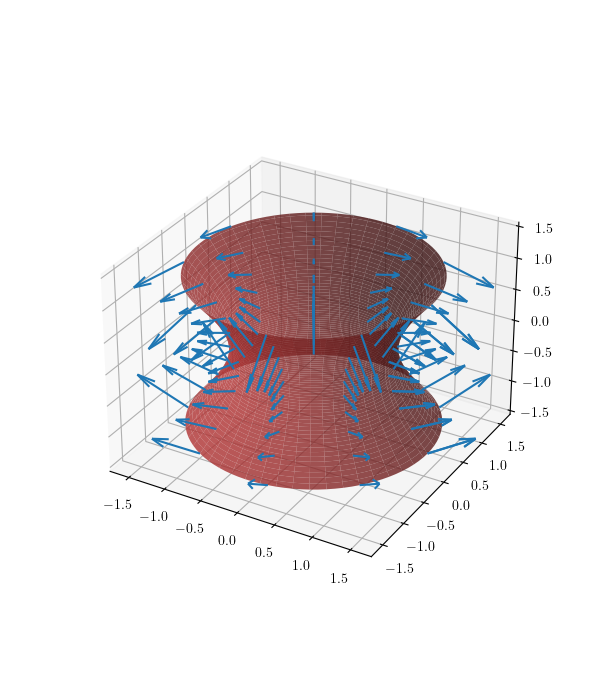

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(6,7))
    ax = fig.add_subplot(projection='3d')
    plt.ion()
    
    s = linspace(0,2*pi,100)
    t = linspace(-1,1,100)
    s,t = meshgrid(s,t)
    X = cosh(t)*cos(s)
    Y = cosh(t)*sin(s)
    Z = sinh(t)

    s = linspace(0,2*pi,10)
    t = linspace(-1,1,10)
    s,t = meshgrid(s,t)
    U = cosh(t)*cos(s)
    V = cosh(t)*sin(s)
    W = sinh(t)
    
    ax.plot_surface(X,Y,Z,alpha=.8,color=(.7,.2,.2))

    ax.quiver(U,V,W,2*U/5,2*V/5, -2*W/5)
    ax.set_zlim(-1.5,1.5)
    ax.grid(True)
    
    return fig.canvas

a("A level surface")   

<p style="padding-bottom:40%;"> </p>

### 2. It points in the direction of greatest change.

<p style="padding-bottom:40%;"> </p>

Which direction $\vec u$ maximizes $D_\vec u f$?

$$D_\vec u f = \nabla f \cdot \vec u = |\nabla f||\vec u| \cos \theta$$

Since $|\vec u | = 1$, this is maximized when $\theta = 0$. 

In other words, $$\vec u = \frac{\nabla f}{|\nabla f|}$$ the unit vector in the direction of the gradient.

<p style="padding-bottom:40%;"> </p>

### 3. Its magnitude is the amount of greatest change.

<p style="padding-bottom:40%;"> </p>

We simply compute using the above $$D_{\frac{\nabla f}{|\nabla f|}} f = \nabla f \cdot \frac{\nabla f}{|\nabla f|}$$

$$= \frac{|\nabla f|^2}{|\nabla f|} = |\nabla f|.$$

<p style="padding-bottom:40%;"> </p>

## Example

What happens when particle "follows the gradient" of a function?

Suppose you have a swarm of drones equipped with temperature sensors (and GPS, etc.) which are programmed to follow the heat gradient. They are dropped over a forest fire and let go. What will one see?

In [7]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    # Preliminaries
    i = np.array([1,0])
    j = np.array([0,1])

    def update(pts,f,dt=1/100):
        out = []
        for n in range(pts.shape[1]):
            v = pts[:,n] # a point
            z0 = f(*v) # value at the point
            z1 = f(*(v + dt*i)) # value to the right
            z2 = f(*(v + dt*j)) # value above
            out.append(v + np.array([z1-z0,z2-z0])) # approx v + dt * grad(f)
        return np.column_stack(out)
    
    slider = IntSlider(min=0, max=99, value=0)
    t = slider.value
    
    checkbox = Checkbox(value=False)
    field = checkbox.value
    
    f = lambda x,y: 50*(x+y)*(x-2/3)*(y-2/3)/(1+7*(x-1/2)**4+7*(y-1/2)**4)
    pts = 2*np.random.rand(2,100)

    pts_track = [pts]
    for k in range(100):
        pts_track.append(update(pts_track[-1],f=f,dt=1/500))
    pts_track = np.array(pts_track)

    x = y = np.linspace(0,2,102)
    x,y = np.meshgrid(x,y)
    z = f(x,y)

    xx = yy = np.linspace(0,2,26)
    xx,yy = np.meshgrid(xx,yy)
    

    
    cp = ax.contour(x,y,z,levels=np.arange(-8,8,1),cmap='viridis')
    ax.clabel(cp,fmt="%.f");
    ax.set_xlim([0,2])
    ax.set_ylim([0,2])
    q2 = ax.quiver(xx,yy,f(xx+.01,yy)-f(xx,yy),f(xx,yy+.01) - f(xx,yy),color='g')
    if field:
        q2.set_alpha(1)
    else: 
        q2.set_alpha(0)
    sc = ax.scatter(pts_track[t,0],pts_track[t,1], color='b')

 
    def update_dots(change):
        t = slider.value
        # ax.collections.pop()
        # ax.scatter(pts_track[t,0],pts_track[t,1], color='b')
        sc.set_offsets(pts_track[t].transpose())
        
    def update_field(change):
        field = checkbox.value
        if field:
            q2.set_alpha(1)
        else: 
            q2.set_alpha(0)    
    slider.observe(update_dots, names='value')

    return VBox([HBox([slider, checkbox]), fig.canvas])

a("Follow the gradient")

<div style="padding-bottom: 40%"></div>

## Exercises

  1. Find the maximum rate of change of each function at the given point and the direction in which is occurs.
  
    1. $f(x,y) = \frac{y^2}{x}$ at $(4,2)$.
    

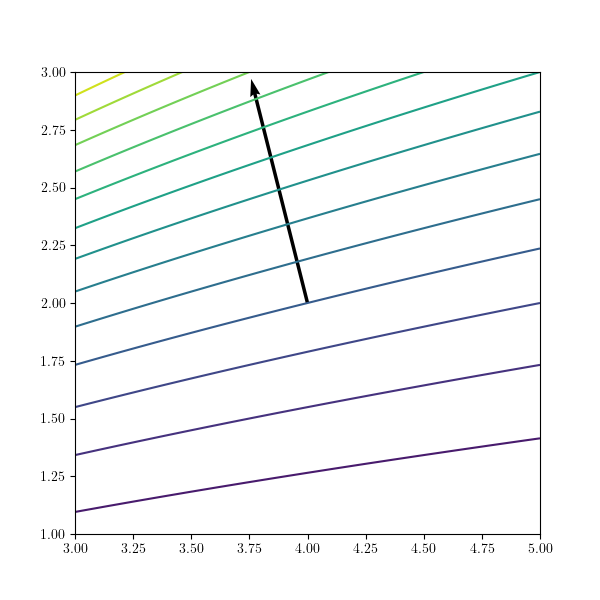

In [8]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    x = linspace(3,5,100)
    y = linspace(1,3,100)

    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(6,6))
    plt.ion()
    x,y = meshgrid(x,y)
    c = plt.contour(x,y,y**2/x,levels=16)
    plt.quiver(4,2,-1/sqrt(17),4/sqrt(17),angles='xy', scale_units='xy', scale=1);
    # plt.quiver(4,2,-1/4,1,angles='xy', scale_units='xy', scale=1)
    
    return fig.canvas

a("Ex. 1a")



<div style="padding-bottom: 20%"></div>

  B. $g(x,y,z) = \tan^{-1}(x+2y+3z)$ at $(5,-1,-1)$.
  

<p style="padding-bottom:40%;"> </p>

[Demo](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&grid=false&obj0_kind=level&obj0_params_g=atan%28x+%2B+2+y+%2B+3+z%29&obj0_params_k=0&obj0_params_a=-6&obj0_params_b=6&obj0_params_c=-2&obj0_params_d=2&obj0_params_e=-2&obj0_params_f=2&obj1_kind=vector&obj1_params_a=1&obj1_params_b=2&obj1_params_c=3&obj1_params_x=5&obj1_params_y=-1&obj1_params_z=-1&obj1_params_show=true&obj1_params_color=%2300a713)

  2. Find the equation of the tangent plane to the surface $z+1=x e^y \cos (z)$ at the point $(1,0,0)$.

#### 
<p style="padding-bottom:40%;"> </p>

[Demo](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&grid=false&obj0_kind=level&obj0_params_g=x+*+exp%28y%29+*+cos%28z%29+-+z&obj0_params_k=1&obj0_params_a=-6&obj0_params_b=6&obj0_params_c=-6&obj0_params_d=6&obj0_params_e=-6&obj0_params_f=6&obj1_kind=vector&obj1_params_a=-1&obj1_params_b=-1&obj1_params_c=1&obj1_params_x=1&obj1_params_y=0&obj1_params_z=0&obj1_params_show=true&obj1_params_color=%2300a713&obj2_kind=level&obj2_params_g=-x+-+y+%2B+z&obj2_params_k=-1&obj2_params_a=-2&obj2_params_b=2&obj2_params_c=-2&obj2_params_d=2&obj2_params_e=-2&obj2_params_f=2)